# Q1 Fireforest 

In [ ]:
#!pip install keras


In [5]:
!pip install tensorflow --ignore-installed --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Progr


  Using cached tensorflow-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached numpy-1.22.4-cp310-cp310-win_amd64.whl (14.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.19.4-cp310-cp310-win_amd64.whl (895 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached setuptools-62.3.2-py3-none-any.whl (1.2 MB)


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [7]:
forestf = pd.read_csv("forestfires (1).csv")
forestf

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


EDA PART 

In [8]:
forestf.shape

(517, 31)

In [9]:
forestf.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
forestf.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [13]:
pd.set_option('display.max_columns',None)
forestf.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [14]:
forestf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [16]:
forestf_1 = forestf[~forestf.duplicated()]

In [17]:
forestf_1.reset_index(inplace=True)

In [19]:
forestf_1

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [20]:
forestf_1=forestf_1.drop('index',axis=1)
forestf_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

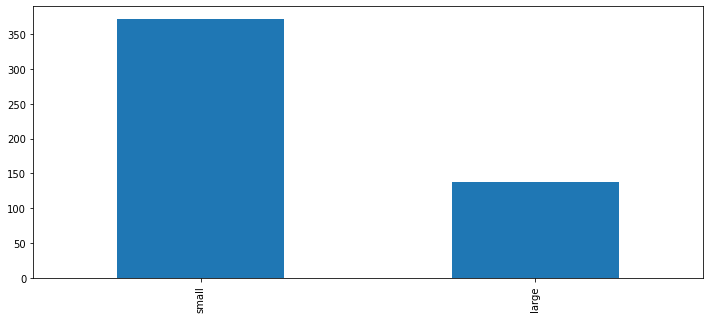

In [22]:
plt.figure(figsize=(12,5))
forestf_1.size_category.value_counts().plot.bar()

<AxesSubplot:>

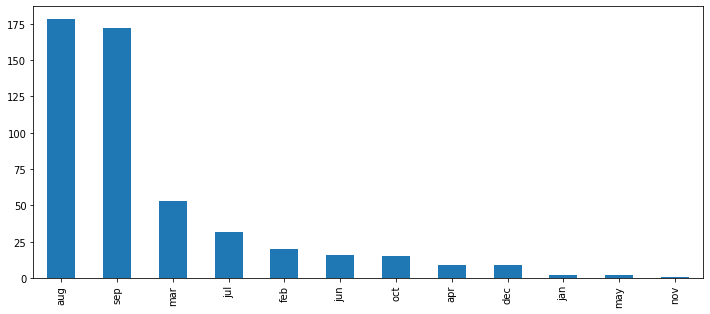

In [25]:
plt.figure(figsize=(12,5))
forestf_1.month.value_counts().plot.bar()

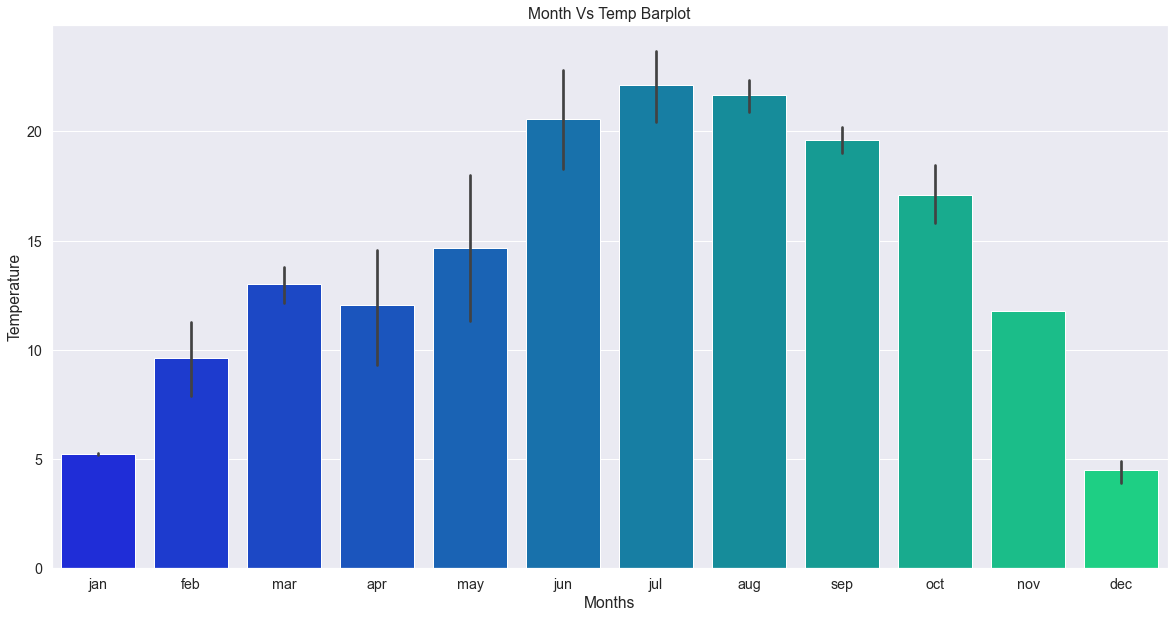

In [28]:
# Plotting Month Vs. temp plot


plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forestf_1,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

# preprocessing

In [29]:
forestf_2 = forestf_1.iloc[:,2:30]

In [31]:
forestf_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
scaler = StandardScaler()

In [33]:
forest_norm = scaler.fit_transform(forestf_2)

In [34]:
# number of columns are more need to use PCA

In [35]:
pca = PCA(n_components=28)
pca_values=pca.fit_transform(forest_norm)
pca_values

array([[ 3.75397242e+00, -1.28931864e+00, -8.75381400e-01, ...,
        -6.46896939e-02,  2.09255540e-15, -8.22967562e-17],
       [ 3.80252163e-01,  7.93234886e-01, -1.13373932e+00, ...,
         3.38555037e-02,  8.00368312e-15, -1.13232384e-15],
       [ 6.61966478e-01,  1.14867222e+00, -1.19498731e+00, ...,
         2.75936820e-02, -6.38784761e-15,  7.72987702e-16],
       ...,
       [ 9.30557831e-01, -2.58780463e-01,  2.72948746e+00, ...,
        -3.01077280e-01,  2.85794937e-16, -1.11665761e-16],
       [-1.62707928e+00, -9.81426536e-01,  4.03873956e-01, ...,
         3.43662358e-02, -3.45980620e-17,  6.55808428e-17],
       [ 4.05704813e+00, -3.65854834e-01, -3.77790131e-01, ...,
        -2.51066990e-02,  7.47487712e-17, -3.76543390e-17]])

In [36]:
variance = pca.explained_variance_ratio_
variance

array([1.35679861e-01, 6.86304793e-02, 6.19524620e-02, 5.35834443e-02,
       4.74831741e-02, 4.68198775e-02, 4.36569624e-02, 4.28252784e-02,
       4.07424681e-02, 4.01999842e-02, 3.93456312e-02, 3.83337057e-02,
       3.64885130e-02, 3.62973143e-02, 3.57074619e-02, 3.49977780e-02,
       3.35241673e-02, 3.25086440e-02, 3.07199314e-02, 3.00762122e-02,
       2.34863017e-02, 2.08579572e-02, 1.18330651e-02, 8.92711776e-03,
       4.52514829e-03, 7.97059751e-04, 2.67581345e-32, 7.15469224e-33])

In [37]:
variance_1 = np.cumsum(np.round(variance,decimals = 4)*100)
variance_1

array([13.57, 20.43, 26.63, 31.99, 36.74, 41.42, 45.79, 50.07, 54.14,
       58.16, 62.09, 65.92, 69.57, 73.2 , 76.77, 80.27, 83.62, 86.87,
       89.94, 92.95, 95.3 , 97.39, 98.57, 99.46, 99.91, 99.99, 99.99,
       99.99])

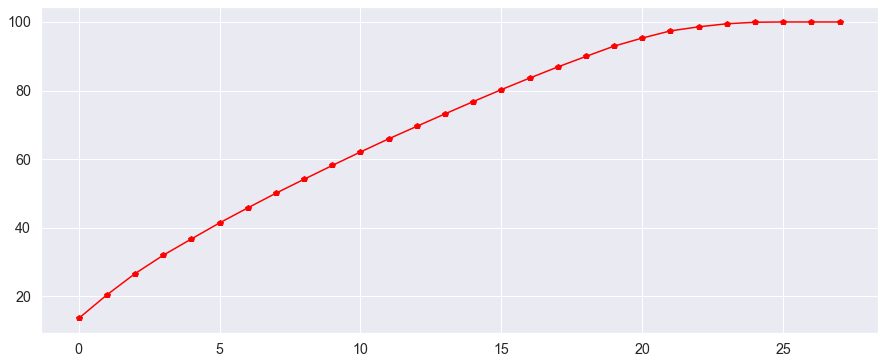

In [38]:
# Variance graph of PCA
plt.figure(figsize=(15,6))
plt.plot(variance_1,color='red',marker='p')

In [39]:
# selecting first 25 pca out of 28

In [42]:
Final=pd.concat([pd.DataFrame(pca_values[:,:25]),forestf_1[['size_category']]],axis=1)
Final.size_category.replace(('large','small'),(1,0),inplace=True)


In [41]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,size_category
0,3.753972,-1.289319,-0.875381,-2.057203,-1.539565,0.525262,0.175580,-0.013656,-0.048815,-0.455360,0.412832,1.298344,-0.545239,-0.556329,-0.295589,-0.172690,-0.015770,0.617097,0.442868,-0.520640,-0.941988,-0.434493,-0.103097,-0.027117,-0.247662,0
1,0.380252,0.793235,-1.133739,1.511056,2.695340,1.307453,-2.701150,0.394590,-0.575579,0.159513,3.023977,-0.359222,-1.367010,1.816828,-0.899973,-2.497825,0.437228,0.679929,-1.027684,-1.359530,-0.898012,0.823984,0.221564,0.289076,0.097744,0
2,0.661966,1.148672,-1.194987,2.499254,0.939840,0.513138,-1.769094,-1.907318,-0.082289,0.292203,3.473222,-0.307193,-1.252620,1.778173,-0.959708,-2.539273,-0.721879,-0.296456,0.591026,-1.368595,-0.346942,0.725410,0.110888,0.355542,-0.384121,0
3,3.369783,-1.114478,0.348462,-2.201644,-2.081776,0.724578,-0.402971,-0.193619,-0.669534,-1.281672,-0.058304,1.025056,-0.716653,-0.239667,0.536274,-0.030154,0.034921,0.289695,0.770581,-1.821270,-0.860501,1.493872,-0.332142,-0.378250,1.142589,0
4,2.983335,-0.834919,1.337751,-0.041757,-1.087638,-0.795127,-0.832519,0.519465,0.697278,-1.994983,0.319614,1.162575,-0.071786,-0.596982,0.504038,0.816212,1.056955,-0.683917,0.431060,-1.927667,-0.697452,1.997097,-0.535772,0.177156,1.454403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.093232,0.113069,1.292821,1.506902,0.544380,-1.016410,-0.149738,0.849740,0.685424,-0.372472,1.039952,0.219833,0.300512,-0.247504,-0.768037,0.300026,0.541820,0.466450,0.339362,1.867316,-1.424191,-0.860211,-1.217031,-0.682027,0.092838,1
505,0.802495,-0.084618,2.688642,0.225348,0.390693,-0.831450,0.083194,0.178129,1.238868,-0.228236,0.769589,-0.056949,0.484614,-0.202784,-0.278037,0.350106,0.526695,0.539276,0.390010,0.008163,-0.917800,-1.368263,-1.281017,-1.193708,0.582727,1
506,0.930558,-0.258780,2.729487,-0.077863,0.423724,-0.888077,-0.023792,0.212013,1.190787,-0.246062,0.765835,-0.017635,0.221811,-0.198835,-0.466074,0.322612,0.376733,0.076586,0.353063,0.134062,-0.718433,-1.745729,-1.181496,-1.214221,0.491187,1
507,-1.627079,-0.981427,0.403874,1.211603,-0.527529,0.709734,0.634502,-1.490876,0.068663,-0.052213,0.543014,0.251698,0.243766,0.074894,-0.158461,0.001578,-1.045889,-0.810348,-0.075929,0.498942,0.052525,-0.066572,-0.057817,-0.309163,0.413763,0


In [43]:
# spliting data

In [44]:
array = final.values
x= array[:,0:25]
y = array[:,25]

# model Building 

In [47]:
model = Sequential()
model.add(Dense(12, input_dim=25, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x, y, validation_split=0.3, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 8ms/step - loss: 0.6357 - accuracy: 0.7079 - val_loss: 0.6746 - val_accuracy: 0.6405
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7275 - val_loss: 0.6672 - val_accuracy: 0.6471
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7556 - val_loss: 0.6674 - val_accuracy: 0.6667
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7669 - val_loss: 0.6733 - val_accuracy: 0.6667
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7753 - val_loss: 0.6771 - val_accuracy: 0.6601
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7753 - val_loss: 0.6792 - val_accuracy: 0.6601
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7781 - val_loss: 0.6812 - val_accuracy: 0.6601
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9522 - val_loss: 0.9305 - val_accuracy: 0.7516
Epoch 60/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9438 - val_loss: 0.9487 - val_accuracy: 0.7386
Epoch 61/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9579 - val_loss: 0.9643 - val_accuracy: 0.7255
Epoch 62/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9494 - val_loss: 0.9648 - val_accuracy: 0.7386
Epoch 63/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9551 - val_loss: 0.9846 - val_accuracy: 0.7386
Epoch 64/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9579 - val_loss: 0.9954 - val_accuracy: 0.7386
Epoch 65/200
36/36 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9579 - val_loss: 0.9970 - val_accuracy: 0.7451
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9916 - val_loss: 1.3768 - val_accuracy: 0.7908
Epoch 117/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9916 - val_loss: 1.3741 - val_accuracy: 0.7974
Epoch 118/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9944 - val_loss: 1.3716 - val_accuracy: 0.8039
Epoch 119/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9972 - val_loss: 1.3892 - val_accuracy: 0.8039
Epoch 120/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9972 - val_loss: 1.4067 - val_accuracy: 0.8039
Epoch 121/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9831 - val_loss: 1.4262 - val_accuracy: 0.7843
Epoch 122/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 1.4172 - val_accuracy: 0.7908
Epoch 123/200

36/36 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9972 - val_loss: 1.7506 - val_accuracy: 0.8105
Epoch 174/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9972 - val_loss: 1.7656 - val_accuracy: 0.8105
Epoch 175/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9972 - val_loss: 1.7408 - val_accuracy: 0.8105
Epoch 176/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 1.7713 - val_accuracy: 0.8039
Epoch 177/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9972 - val_loss: 1.7645 - val_accuracy: 0.8105
Epoch 178/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 1.7625 - val_accuracy: 0.8105
Epoch 179/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9972 - val_loss: 1.7863 - val_accuracy: 0.8105
Epoch 180/200

In [49]:
# Accuracy
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.9430
accuracy: 94.30%
